<a href="https://colab.research.google.com/github/sagarrokad1/LGMVIP-DataScience/blob/main/TASK-10%20More%20Advance%20Level/Facial_recognition_to_detect_mood_and_suggest_songs_accordingly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

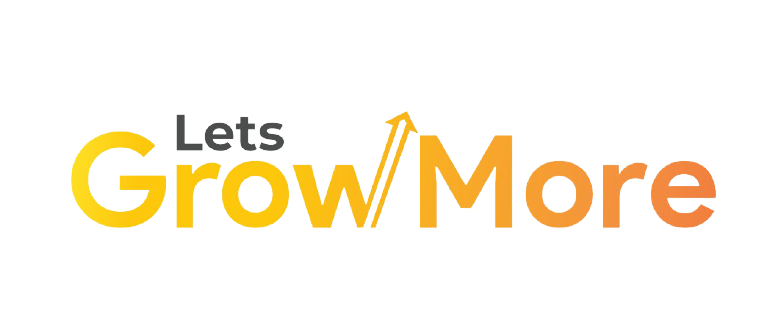

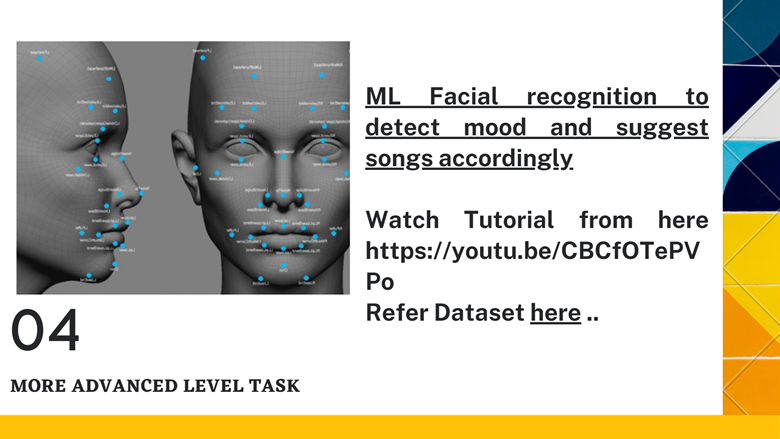

### **Problem Statement**
Facial expression for emotion detection has always been an easy task for humans, but achieving the same task with a computer algorithm is quite challenging. With the recent advancement in computer vision and machine learning, it is possible to detect emotions from images.

In this project we use a technique called facial emotion recognition using convolutional neural networks (FERC) The FERC is based on two-part :-

1. convolutional neural network (CNN): The first-part removes the background from the picture,
2. The second part concentrates on the facial feature vector extraction

##**BY : Sagar Rokad**

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

### Importing Dataset

In [ ]:
train_dir = 'D:\\LGMVIP-Data Science\\More Advanced Level Task\\ML Facial recognition to detect mood and suggest songs accordingly\\fer2013\\train\\'
test_dir = 'D:\\LGMVIP-Data Science\\More Advanced Level Task\\ML Facial recognition to detect mood and suggest songs accordingly\\fer2013\\test\\'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3994      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


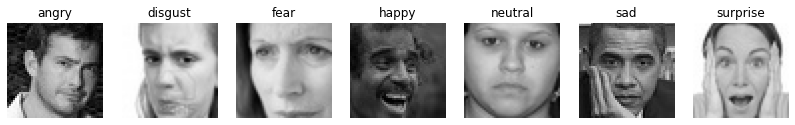

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

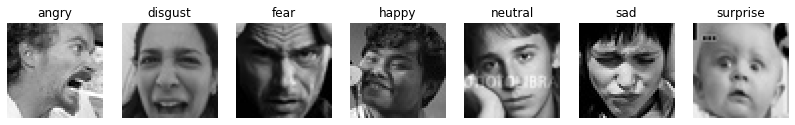

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(test_dir):
    img = load_img((test_dir + expression +'/'+ os.listdir(test_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

### Plot of number of images in training set

<AxesSubplot:>

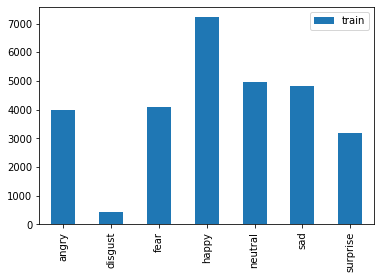

In [ ]:
train_count.transpose().plot(kind='bar')

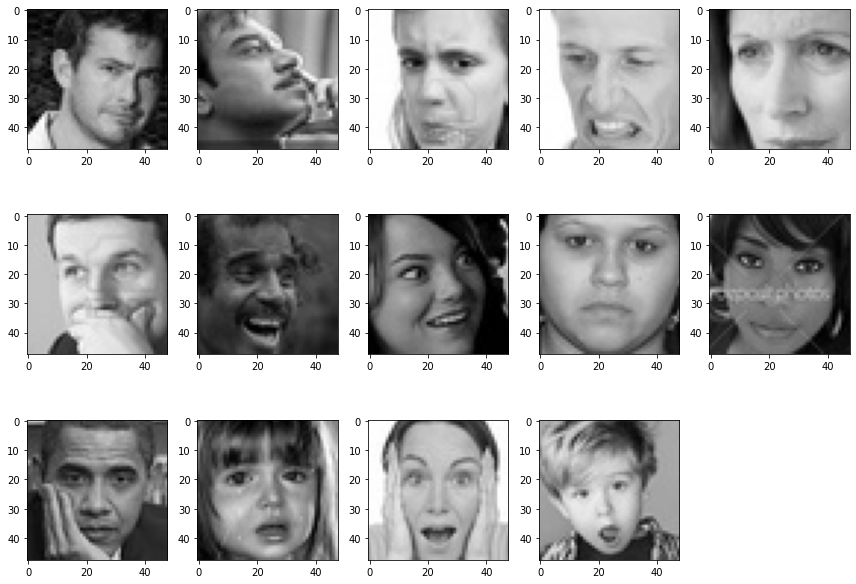

In [ ]:
img_size = 48
plt.figure(0, figsize=(12,20))
index = 0
for link in os.listdir("D:\\LGMVIP-Data Science\\More Advanced Level Task\\ML Facial recognition to detect mood and suggest songs accordingly\\fer2013\\train\\"):
    for i in range(1,3):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("D:\\LGMVIP-Data Science\\More Advanced Level Task\\ML Facial recognition to detect mood and suggest songs accordingly\\fer2013\\train\\" + link + "/" +os.listdir("D:\\LGMVIP-Data Science\\More Advanced Level Task\\ML Facial recognition to detect mood and suggest songs accordingly\\fer2013\\train\\" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()

### Plot of number of images in test set

<AxesSubplot:>

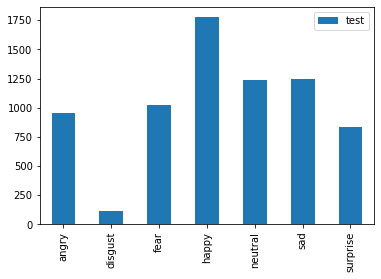

In [ ]:
test_count.transpose().plot(kind='bar')

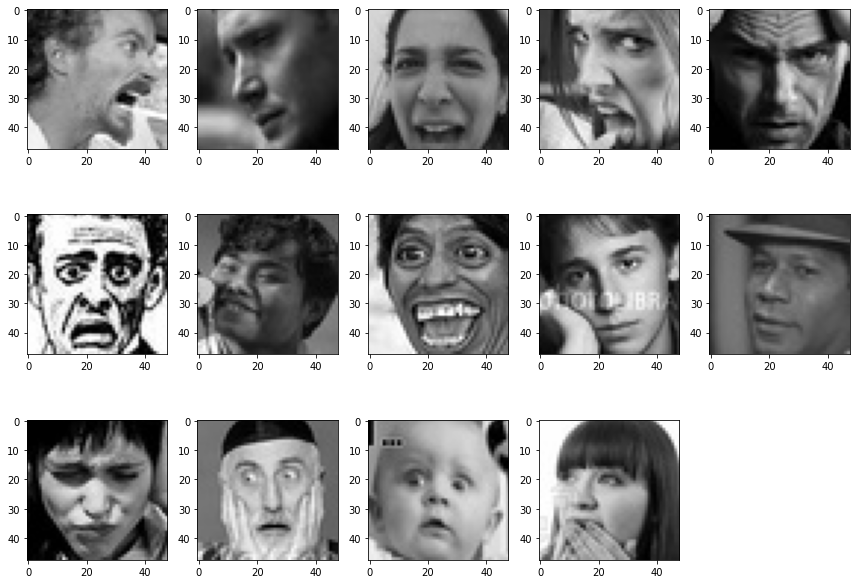

In [ ]:
img_size = 48
plt.figure(0, figsize=(12,20))
index = 0
for link in os.listdir("D:\\LGMVIP-Data Science\\More Advanced Level Task\\ML Facial recognition to detect mood and suggest songs accordingly\\fer2013\\test\\"):
    for i in range(1,3):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("D:\\LGMVIP-Data Science\\More Advanced Level Task\\ML Facial recognition to detect mood and suggest songs accordingly\\fer2013\\test\\" + link + "/" +os.listdir("D:\\LGMVIP-Data Science\\More Advanced Level Task\\ML Facial recognition to detect mood and suggest songs accordingly\\fer2013\\test\\" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()


### Creating training and test sets

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

### Defining Model

In [ ]:
def get_model(input_size, classes=7):
     #Initialising the CNN
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [ ]:
fernet = get_model((row,col,1), classes)
fernet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2

C:\Users\Mihir\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


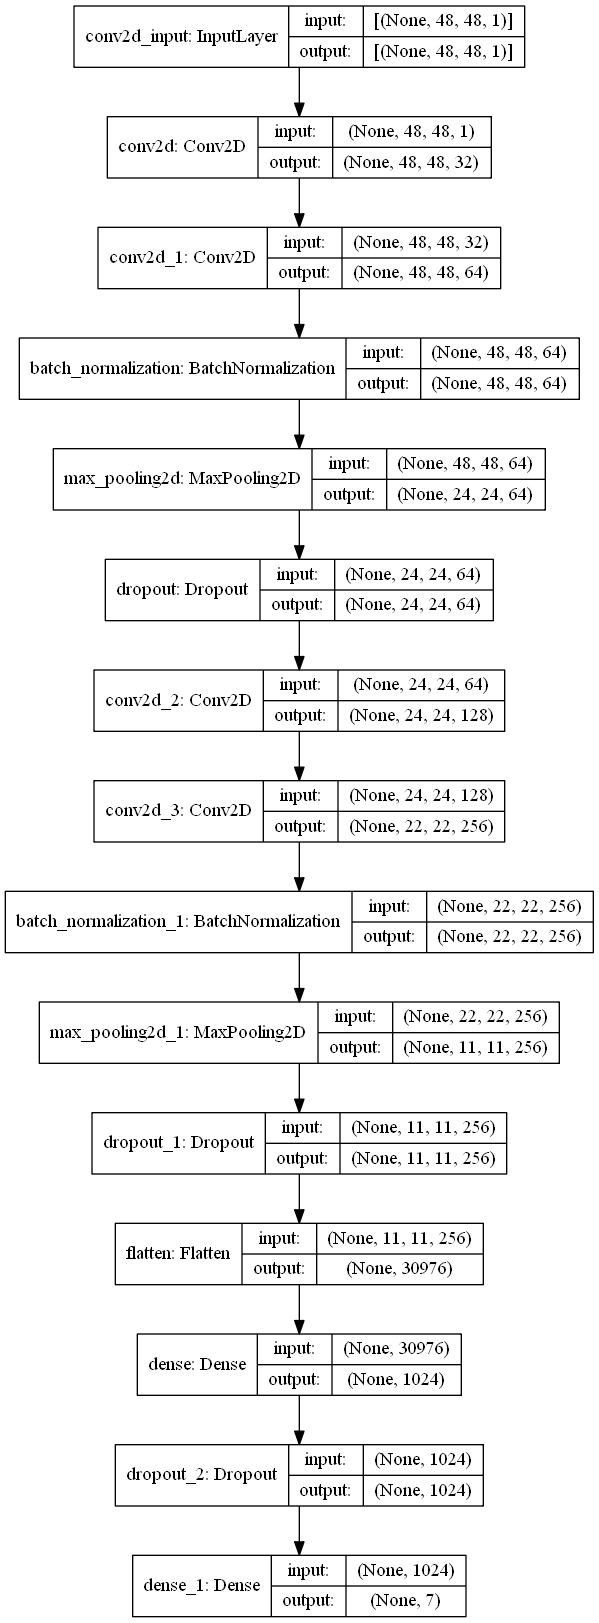

In [ ]:
plot_model(fernet, to_file='fernet.png', show_shapes=True, show_layer_names=True)

### Callbacks Function

In [ ]:
chk_path = 'ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

### Training Model

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=10,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/10
448/448 [==============================] - 1332s 3s/step - loss: 4.2524 - accuracy: 0.2803 - val_loss: 7.7452 - val_accuracy: 0.1232

Epoch 00001: val_loss improved from inf to 7.74517, saving model to ferNet.h5
Epoch 2/10
448/448 [==============================] - 1126s 3s/step - loss: 3.4732 - accuracy: 0.3360 - val_loss: 3.1275 - val_accuracy: 0.3884

Epoch 00002: val_loss improved from 7.74517 to 3.12752, saving model to ferNet.h5
Epoch 3/10
448/448 [==============================] - 1201s 3s/step - loss: 2.9299 - accuracy: 0.3740 - val_loss: 2.5878 - val_accuracy: 0.4348

Epoch 00003: val_loss improved from 3.12752 to 2.58782, saving model to ferNet.h5
Epoch 4/10
448/448 [==============================] - 1459s 3s/step - loss: 2.5147 - accuracy: 0.4035 - val_loss: 2.2629 - val_accuracy: 0.4386

Epoch 00004: val_loss improved from 2.58782 to 2.26292, saving model to ferNet.h5
Epoch 5/10
448/448 [==============================] - 1248s 3s/step - loss: 2.2058 - accuracy: 0

### Loss and Accuracy plot

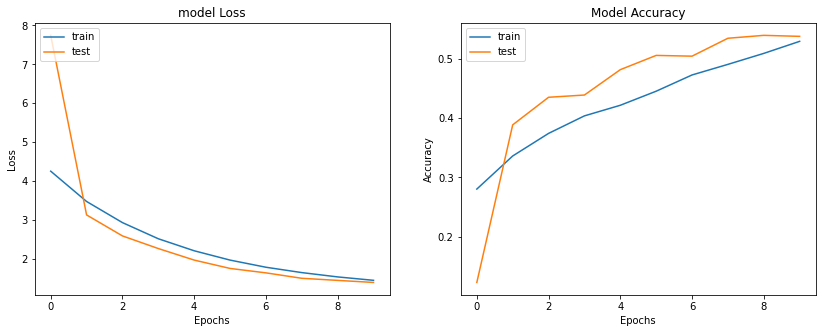

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model evaluation

In [ ]:
train_loss, train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 100s 889ms/step - loss: 1.3916 - accuracy: 0.5372
final train accuracy = 55.66 , validation accuracy = 53.72


In [ ]:
fernet.save_weights('fernet_bestweight.h5')

### Confusion Matrix and Classification on training set

Confusion Matrix
[[ 510    4  353 1334  649  574  570]
 [  45    1   44  138   83   64   61]
 [ 532    3  319 1416  689  577  561]
 [ 872    4  560 2440 1282 1064  993]
 [ 636    4  409 1608  847  732  729]
 [ 564    0  392 1692  835  669  678]
 [ 431    5  253 1055  545  464  418]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.13      0.13      3994
     disgust       0.05      0.00      0.00       436
        fear       0.14      0.08      0.10      4097
       happy       0.25      0.34      0.29      7215
     neutral       0.17      0.17      0.17      4965
         sad       0.16      0.14      0.15      4830
    surprise       0.10      0.13      0.12      3171

    accuracy                           0.18     28708
   macro avg       0.15      0.14      0.14     28708
weighted avg       0.17      0.18      0.17     28708



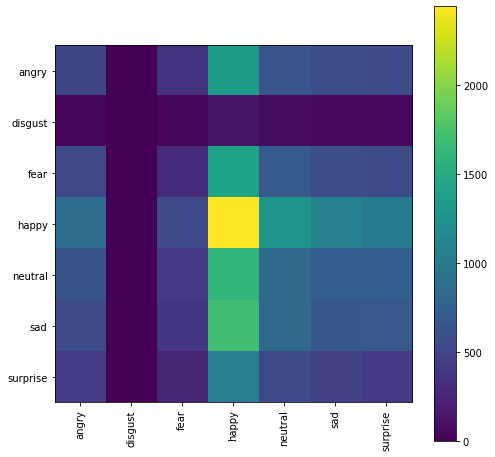

In [ ]:
y_pred = fernet.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

### Confusion Matrix and Classification on test set

Confusion Matrix
[[158   0  87 317 164 107 125]
 [ 17   0  13  33  20  10  18]
 [171   0  97 302 179 116 159]
 [236   1 153 590 325 214 255]
 [180   3 108 364 260 134 184]
 [180   0 110 382 225 149 201]
 [109   1  64 291 128 100 138]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.16      0.16       958
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.09      0.12      1024
       happy       0.26      0.33      0.29      1774
     neutral       0.20      0.21      0.21      1233
         sad       0.18      0.12      0.14      1247
    surprise       0.13      0.17      0.14       831

    accuracy                           0.19      7178
   macro avg       0.15      0.16      0.15      7178
weighted avg       0.19      0.19      0.19      7178



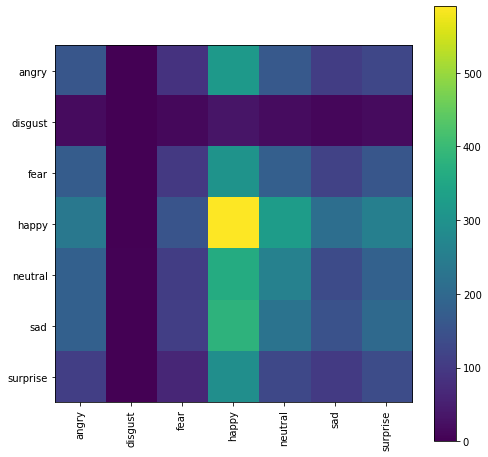

In [ ]:
y_pred = fernet.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)